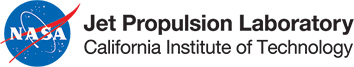

# **Delta-X Workshop**

## **Module 4: Water Level Gauges**
*Created by Alexandra Christensen (April 2022)*

*Jet Propulsion Laboratory, California Institute of Technology*

*© 2022 California Institute of Technology. Government sponsorship acknowledged.*

Data is not yet available for download

Data citations:

> Christensen, A.L., J.M. Mallard, M. Simard, and T. Pavelsky. 2021. Delta-X: Water Surface Elevation, Coastal Louisiana, 2021. ORNL DAAC, Oak Ridge, Tennessee, USA. 


Authors:

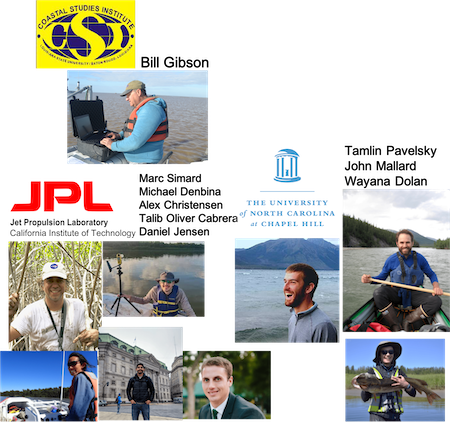

In [1]:
!pip install rasterio
import rasterio
import rasterio.plot

from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import string

input_dir = os.getcwd()
print(input_dir)


     |████████████████████████████████| 19.3 MB 91.4 MB/s 
/content


**If you are not using Google Colab, don't run the next cell. It will change your input directory to the shared Google Drive folder, which you should only do if you're using Google Colab**

Second, we will grant access to your Google Drive account. If you have not done this before (or it's been a while), you will need to approve access. There will be 2 popups, make sure to allow both.

In [2]:
#For access to Google Drive files
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#For saving to Google Drive
from google.colab import drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
Gdrive = GoogleDrive(gauth)

drive.mount('/content/drive',force_remount=True)
input_dir = '/content/drive/My Drive/DeltaX_Workshop_2022/Tutorials/0_Field/Module4_Gauges/'



Mounted at /content/drive


First, we need to import a basemap that we'll use to make maps below

In [5]:
basemap = rasterio.open(input_dir + 'basemap.tif')


Then, we need to open the summary gauge file

In [3]:
gauge_file = pd.read_csv(input_dir + "deltax_water_level_gauges.csv")


Let's plot the locations of the gauges

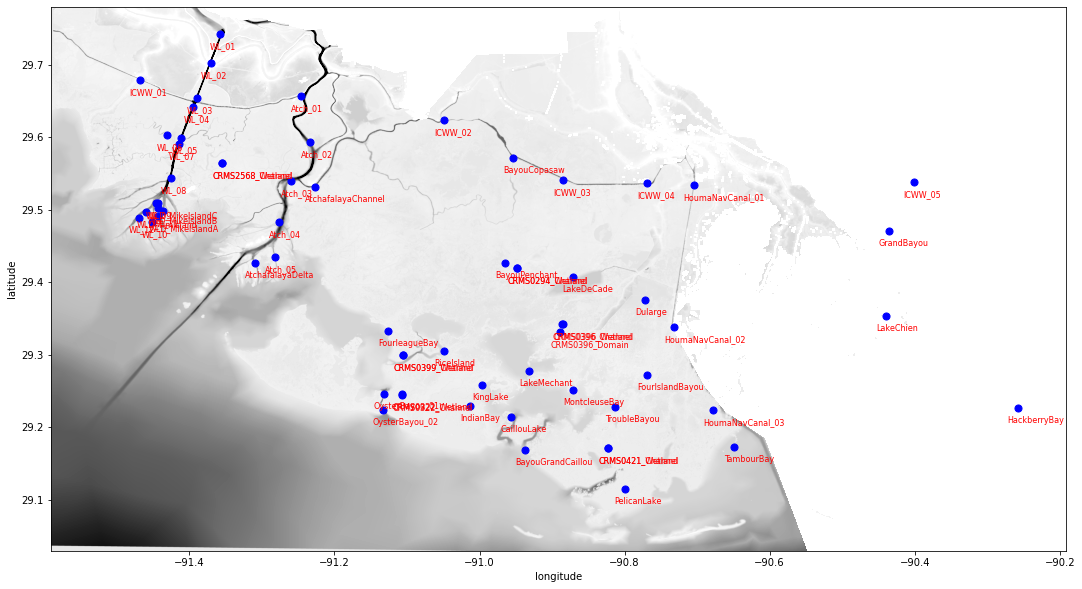

In [6]:
fig, ax = plt.subplots(figsize=(30,10))
rasterio.plot.show(basemap,transform=basemap.transform,vmin=-10,vmax=2,ax=ax,cmap='Greys_r')

gauge_file.plot(x="longitude", y="latitude",ax=ax,kind="scatter",s=50,c='blue')
for k, v in gauge_file.iterrows():
    ax.annotate(v['site_id'],[v['longitude'],v['latitude']],
               xytext=(-10,-15), textcoords='offset points',
               family='sans-serif', fontsize=8, color='red')


Let's now compare three different gauges: 


1.   Tambour Bay is located furthest towards the ocean
2.   Four Island Bayou is located within Terrebonne marshes
3.   Lake Decade is the furthest inland



In [8]:
tambour = pd.read_csv(input_dir + "deltax_water_level_Terrebonne_TambourBay.csv")
fourisland = pd.read_csv(input_dir + "deltax_water_level_Terrebonne_FourIslandBayou.csv")
lakedecade = pd.read_csv(input_dir + "deltax_water_level_Terrebonne_LakeDeCade.csv")


Date and time formats can be confusing. Here we use the to_datetime function and combine the string date and time columns to create a timestamp that Matploblib and Pandas has recognize as time.

In [9]:
tambour['datetime'] = pd.to_datetime(tambour['date'].astype('string') + " " +tambour['time'])
fourisland['datetime'] = pd.to_datetime(fourisland['date'].astype('string') + " " +fourisland['time'])
lakedecade['datetime'] = pd.to_datetime(lakedecade['date'].astype('string') + " " +lakedecade['time'])

tambour.head()

,date,time,total_water_depth,water_temperature,conductivity,water_surface_elevation_NAVD88,datetime
0,20210307,20:15:00,0.591,16.9,NAN,NAN,2021-03-07 20:15:00
1,20210307,20:30:00,0.596,16.8,NAN,NAN,2021-03-07 20:30:00
2,20210307,20:45:00,0.562,16.8,NAN,NAN,2021-03-07 20:45:00
3,20210307,21:00:00,0.571,16.8,NAN,NAN,2021-03-07 21:00:00
4,20210307,21:15:00,0.561,16.7,NAN,NAN,2021-03-07 21:15:00


Now, we can plot the time series of each gauge.

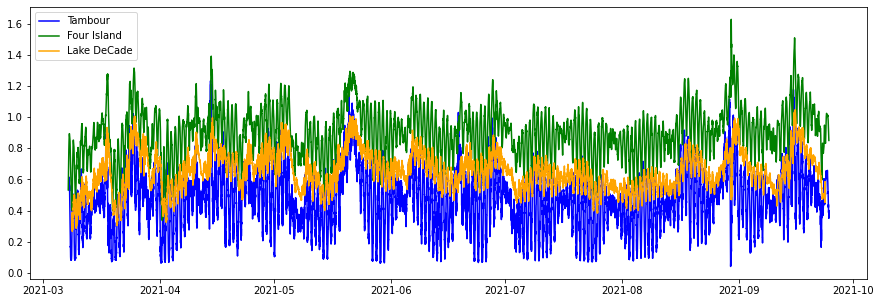

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(tambour['datetime'],tambour['total_water_depth'],c='blue')
ax.plot(fourisland['datetime'],fourisland['total_water_depth'],c='green')
ax.plot(lakedecade['datetime'],lakedecade['total_water_depth'],c='orange')
ax.legend(('Tambour','Four Island','Lake DeCade'))



Remember that these are not water surface elevations, but water depths. Therefore, they are not directly comparable to each other. Instead, we can use these to compare river and tide signals within each time series. 

# What do you notice between these three sites?

# Let's zoom in to August-September 2021. 

# What event happened during this time?

(0.0, 1.8)

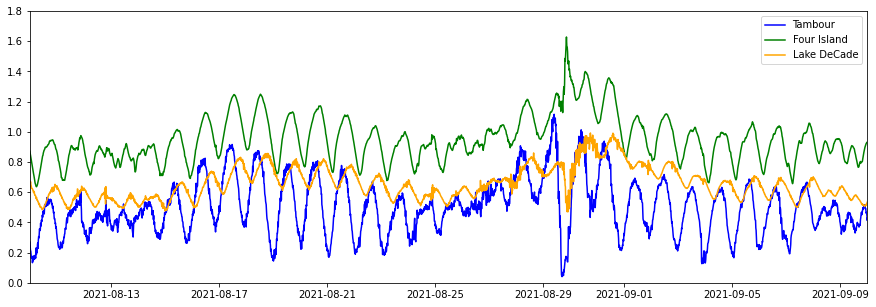

In [11]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(tambour['datetime'],tambour['total_water_depth'],c='blue')
ax.plot(fourisland['datetime'],fourisland['total_water_depth'],c='green')
ax.plot(lakedecade['datetime'],lakedecade['total_water_depth'],c='orange')
ax.legend(('Tambour','Four Island','Lake DeCade'))
ax.set_xlim([pd.to_datetime('2021-08-10 00:00:00'), pd.to_datetime('2021-9-10 00:00:00')])
ax.set_ylim([0,1.8])


# How do these three sites behave during Hurricane Ida? Is this what you expected?

Let's import a few other gauges - representing other areas of coastal Louisiana.



1.   ICWW 1 is the furthest west gauge, located on the Intracoastal Waterway
2.   Atcha 5 is located in the Atchafalaya Delta
3.   Oyster Bayou 2 is located in the inlet connecting Fourleague Bay to the ocean
4.   Houma Navigation Canal is a dredged canal from Houma to the ocean


In [13]:
icww1 = pd.read_csv(input_dir + "deltax_water_level_ICWW _ICWW_01.csv")
atcha5 = pd.read_csv(input_dir + "deltax_water_level_Atchafalaya_Atch_05.csv")
oyster = pd.read_csv(input_dir + "deltax_water_level_Terrebonne_OysterBayou_02.csv")
houmanav = pd.read_csv(input_dir + "deltax_water_level_Terrebonne_HoumaNavCanal_03.csv")



Again, we need to convert date and time strings to time stamps

In [14]:
icww1['datetime'] = pd.to_datetime(icww1['date'].astype('string') + " " +icww1['time'])
atcha5['datetime'] = pd.to_datetime(atcha5['date'].astype('string') + " " +atcha5['time'])
oyster['datetime'] = pd.to_datetime(oyster['date'].astype('string') + " " +oyster['time'])
houmanav['datetime'] = pd.to_datetime(houmanav['date'].astype('string') + " " +houmanav['time'])


And plot

(0.0, 2.0)

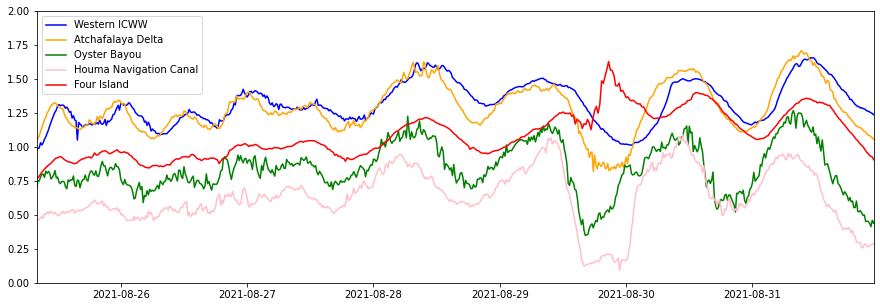

In [15]:
fig, ax = plt.subplots(figsize = (15,5))
ax.plot(icww1['datetime'],icww1['total_water_depth'],c='blue')
ax.plot(atcha5['datetime'],atcha5['total_water_depth'],c='orange')
ax.plot(oyster['datetime'],oyster['total_water_depth'],c='green')
ax.plot(houmanav['datetime'],houmanav['total_water_depth'],c='pink')
ax.plot(fourisland['datetime'],fourisland['total_water_depth'],c='red')
ax.legend(('Western ICWW','Atchafalaya Delta','Oyster Bayou','Houma Navigation Canal','Four Island'))
ax.set_xlim([pd.to_datetime('2021-08-25 08:00:00'), pd.to_datetime('2021-08-31 23:00:00')])
ax.set_ylim([0,2])


Western ICWW and Atchafalaya Delta appear unimpacted by Hurricane Ida, except maybe slighly amplified tidal ranges.

Oyster Bayou and Houma Nav Canal see a decrease in water level as the hurricane approaches

And Four Island is the only one that see a significant increase in water level during the Hurricane.

Why do you think these differences occur?



Let's see if we can calculate the greatest change in water depth at each gauge during the hurricane. This is just an exercise and only meant as a thinking exercise.

We define a function max_change_in_depth that is applied to each of the gauges. This function calculates the max and min depth between 8am and 11pm on 8/29. We can then compare the max change in depth between sites to see how hurricane ida impacted water levels across these sites

In [16]:
def max_change_in_depth(df):
  period_of_interest = df[(df['datetime']>'2021-08-29 08:00:00') & (df['datetime']<'2021-08-29 23:00:00')]
  max_depth = np.nanmax(period_of_interest['total_water_depth'])
  min_depth = np.nanmin(period_of_interest['total_water_depth'])
  del_depth = max_depth-min_depth

  max_time = period_of_interest[period_of_interest['total_water_depth']==max_depth]['time'].iloc[0]
  min_time = period_of_interest[period_of_interest['total_water_depth']==min_depth]['time'].iloc[0]
  if float(min_time.split(':')[0])>float(max_time.split(':')[0]):
    del_depth = -del_depth

  return del_depth

sites = ['ICWW','Atchafalaya Delta','Oyster Bayou','Houma Nav Canal','Four Island']
change = (max_change_in_depth(icww1),max_change_in_depth(atcha5),max_change_in_depth(oyster),max_change_in_depth(houmanav),max_change_in_depth(fourisland))

Let's plot

[(-1.0, 1.0), Text(0, 0.5, 'Change in Water Depth During Hurricane Ida (m)')]

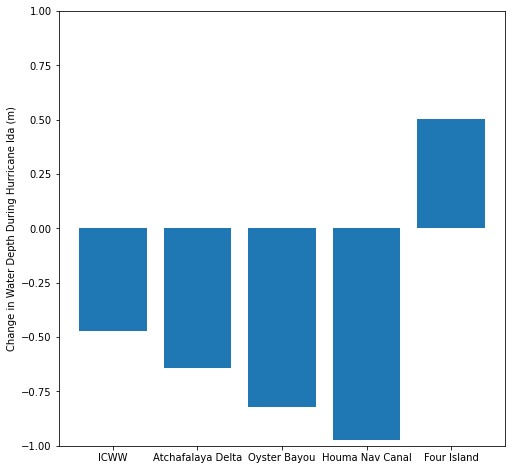

In [17]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(sites,change)
ax.set(ylabel='Change in Water Depth During Hurricane Ida (m)',ylim=[-1,1])


Normal tidal amplitude in these areas are 30-50cm. So it looks like the drop in water level at Oyster Bayou and Houma Nav Canal were impacted by Hurricane Ida.

And we can tell from the time series, the increase in water level at Four Island was likely caused by the hurricane too.